In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
file = "combinedFilters_csv.csv"
filt_df = pd.read_csv(file, delimiter=',')
filt_df.shape

(1295116, 74)

In [3]:
filt_df.head()

,ESN,AVL,Vehículo,Fecha Servidor,Fecha AVL,RPM,Pedal,F. de Carga,Potencia,Estado Motor,...,Engine Operating State (bit),Engine Turbocharger 1 Compressor Inlet Pressure (kPa),Engine Protection System has Shutdown Engine (bit),Engine Protection System Approaching Shutdown (bit),Engine Protection System Timer State (bit),Engine Oil Filter Differential Pressure (Extended Range) (PSI),Engine Oil Priming Pump Control (bit),Engine Controlled Shutdown Request (bit),Engine Emergency (Immediate) Shutdown Indication (bit),Power (HP)
0,66304315,7194,CA-161,2018-05-31 12:02:09,2018-05-31 11:59:49,1909.63,100.0,100.0,3327.87,Transicion,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3327.87
1,66304315,7194,CA-161,2018-05-31 12:26:17,2018-05-31 12:24:04,1901.88,100.0,100.0,3314.37,Transicion,...,15.0,0.0,0.0,3.0,3.0,4.35,3.0,0.0,0.0,3314.37
2,66304315,7194,CA-161,2018-05-31 12:26:52,2018-05-31 12:24:49,1906.88,100.0,100.0,3323.08,Potencia,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3323.08
3,66304315,7194,CA-161,2018-05-31 12:28:07,2018-05-31 12:25:34,1918.00,100.0,100.0,3271.34,Potencia,...,15.0,0.0,0.0,3.0,3.0,2.18,3.0,0.0,0.0,3271.34
4,66304315,7194,CA-161,2018-05-31 12:52:18,2018-05-31 12:46:14,1906.25,100.0,100.0,3321.98,Transicion,...,15.0,0.0,0.0,3.0,3.0,2.90,3.0,0.0,0.0,3321.98


In [4]:
filt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295116 entries, 0 to 1295115
Data columns (total 74 columns):
 #   Column                                                          Non-Null Count    Dtype  
---  ------                                                          --------------    -----  
 0   ESN                                                             1295116 non-null  int64  
 1   AVL                                                             1295116 non-null  int64  
 2   Vehículo                                                        1295116 non-null  object 
 3   Fecha Servidor                                                  1295116 non-null  object 
 4   Fecha AVL                                                       1295116 non-null  object 
 5   RPM                                                             1295116 non-null  float64
 6   Pedal                                                           1295116 non-null  float64
 7   F. de Carga                

In [9]:
newcols = {"ESN":"ESN",
           "AVL":"AVL",
           "Vehículo":"Vehicle",
           "Fecha Servidor":"Serv Date",
           "Fecha AVL":"AVL Date",
           "RPM":"RPM",
           "Pedal":"Pedal",
           "F. de Carga":"Load F",
           "Potencia":"Power",
           "Estado Motor":"Eng state",
           "Engine Torque Mode ()":"Eng Torque Mode",
           "Actual Percent Torque (%)":"Actual Torque (%)",
           "Actual Speed (RPM)":"ActSpeed (RPM)",
           "Accelerator position (%)":"AccelPosition (%)",
           "Percent Load At Current Speed (%)":"Load at CurrSpeed (%)",
           "Fuel rate (L/h)":"Fuel rate (L/h)",
           "Barometric Pressure (PSI)":"Bar Pressure (PSI)",
           "IMP-LB (PSI)":"IMP-LB (PSI)",
           "IMT-LBF (F)":"IMT-LBF (F)",
           "EGT-AV (F)":"EGT-AV (F)",
           "Battery potential (V)":"Battery pot (V)",
           "Coolant temperature (F)":"Coolant T (F)",
           "Fuel Temperature (F)":"Fuel T (F)",
           "Engine Oil Temperature (F)":"EngOil T (F)",
           "Injector Metering (PSI)":"Inject Met (PSI)",
           "Injector Timing (PSI)":"Inj Timing (PSI)",
           "Pre-filter Oil Pressure (PSI)":"Pre-filtOil Press (PSI)",
           "Instantaneous Estimated Brake Power (HP)":"InstantEst B-Power (HP)",
           "IMT-LBR (F)":"IMT-LBR (F)",
           "IMT-RBF (F)":"IMT-RBF (F)",
           "IMT-RBR (F)":"IMT-RBR (F)",
           "IMP-RB (PSI)":"IMP-RB (PSI)",
           "IMP-RB (MCRS) (PSI)":"IMP-RB (MCRS) (PSI)",
           "Oil Differential Pressure (PSI)":"OilDiff Press (PSI)",
           "Ecu temperature (F)":"Ecu T (F)",
           "EGT-01 (F)":"EGT-01 (F)",
           "EGT-02 (F)":"EGT-02 (F)",
           "EGT-03 (F)":"EGT-03 (F)",
           "EGT-04 (F)":"EGT-04 (F)",
           "EGT-05 (F)":"EGT-05 (F)",
           "EGT-06 (F)":"EGT-06 (F)",
           "EGT-07 (F)":"EGT-07 (F)",
           "EGT-08 (F)":"EGT-08 (F)",
           "EGT-09 (F)":"EGT-09 (F)",
           "EGT-10 (F)":"EGT-10 (F)",
           "EGT-11 (F)":"EGT-11 (F)",
           "EGT-12 (F)":"EGT-12 (F)",
           "EGT-13 (F)":"EGT-13 (F)",
           "EGT-14 (F)":"EGT-14 (F)",
           "EGT-15 (F)":"EGT-15 (F)",
           "EGT-16 (F)":"EGT-16 (F)",
           "Crankcase Pressure (HPI) (in-H2O)":"CC Press (HPI) (in-H2O)",
           "Engine Oil Level (%)":"EngOil Level (%)",
           "Post Oil Filter (PSI)":"PostOil Filt (PSI)",
           "Rifle Oil Pressure (PSI)":"RifleOil Press (PSI)",
           "Coolant Pressure (PSI)":"Coolant Press (PSI)",
           "Ambient Temperature (F)":"Ambient T (F)",
           "EGT-17 (F)":"EGT-17 (F)",
           "EGT-18 (F)":"EGT-18 (F)",
           "IMT-LBM (F)":"IMT-LBM (F)",
           "IMT-RBM (F)":"IMT-RBM (F)",
           "Remote accelerator pedal position (%)":"RemoAccelPedal Pos (%)",
           "Engine Pre-filter Oil Pressure (Extended Range) (PSI)":"EngPre-filterOil Pres (Extended) (PSI)",
           "Post Oil Filter (Extended Range) (PSI)":"PostOilFilt (Extended) (PSI)",
           "Engine Operating State (bit)":"EngOp State (bit)",
           "Engine Turbocharger 1 Compressor Inlet Pressure (kPa)":"EngTcharger 1 CompInlet Press (kPa)",
           "Engine Protection System has Shutdown Engine (bit)":"EngProSyst SD Eng (bit)",
           "Engine Protection System Approaching Shutdown (bit)":"EngProSyst App SD (bit)",
           "Engine Protection System Timer State (bit)":"EngProSys TS (bit)",
           "Engine Oil Filter Differential Pressure (Extended Range) (PSI)":"EngOilFiltDiff Press (Extended) (PSI)",
           "Engine Oil Priming Pump Control (bit)":"EngOilPrPump Control (bit)",
           "Engine Controlled Shutdown Request (bit)":"EngControlled SD Request (bit)",
           "Engine Emergency (Immediate) Shutdown Indication (bit)":"EngE (Immediate) SD Ind (bit)",
           "Power (HP)":"Power (HP)"}

In [11]:
filt_df.rename(columns=newcols, inplace=True)
filt_df.columns

Index(['ESN', 'AVL', 'Vehicle', 'Serv Date', 'AVL Date', 'RPM', 'Pedal',
       'Load F', 'Power', 'Eng state', 'Eng Torque Mode', 'Actual Torque (%)',
       'ActSpeed (RPM)', 'AccelPosition (%)', 'Load at CurrSpeed (%)',
       'Fuel rate (L/h)', 'Bar Pressure (PSI)', 'IMP-LB (PSI)', 'IMT-LBF (F)',
       'EGT-AV (F)', 'Battery pot (V)', 'Coolant T (F)', 'Fuel T (F)',
       'EngOil T (F)', 'Inject Met (PSI)', 'Inj Timing (PSI)',
       'Pre-filtOil Press (PSI)', 'InstantEst B-Power (HP)', 'IMT-LBR (F)',
       'IMT-RBF (F)', 'IMT-RBR (F)', 'IMP-RB (PSI)', 'IMP-RB (MCRS) (PSI)',
       'OilDiff Press (PSI)', 'Ecu T (F)', 'EGT-01 (F)', 'EGT-02 (F)',
       'EGT-03 (F)', 'EGT-04 (F)', 'EGT-05 (F)', 'EGT-06 (F)', 'EGT-07 (F)',
       'EGT-08 (F)', 'EGT-09 (F)', 'EGT-10 (F)', 'EGT-11 (F)', 'EGT-12 (F)',
       'EGT-13 (F)', 'EGT-14 (F)', 'EGT-15 (F)', 'EGT-16 (F)',
       'CC Press (HPI) (in-H2O)', 'EngOil Level (%)', 'PostOil Filt (PSI)',
       'RifleOil Press (PSI)', 'Coolant Press (P

In [12]:
filt_df["Vehicle"].unique()

array(['CA-161', 'CA-116', 'CA-64', 'CA-57', 'CA-129', 'CA-155', 'CA-150',
       'CA-94', 'CA-130', 'CA-126', 'CA-87', 'CA-119', 'CA-117', 'CA-88',
       'CA-97'], dtype=object)

In [13]:
filt_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ESN,1295116.0,6.630267e+07,1400.005351,66300987.00,66301308.00,66302417.00,66304318.00,66304554.00
AVL,1295116.0,7.152224e+03,89.909166,7001.00,7138.00,7152.00,7177.00,102133.00
RPM,1295116.0,1.901239e+03,9.153357,1865.25,1896.25,1901.38,1906.25,1978.38
Pedal,1295116.0,9.951305e+01,0.485696,95.20,99.20,99.20,100.00,100.00
Load F,1295116.0,9.999038e+01,0.115289,98.00,100.00,100.00,100.00,100.00
...,...,...,...,...,...,...,...,...
EngOilFiltDiff Press (Extended) (PSI),1254646.0,3.668100e+00,2.322823,0.00,2.18,3.63,5.08,15.95
EngOilPrPump Control (bit),1261217.0,3.000000e+00,0.000000,3.00,3.00,3.00,3.00,3.00
EngControlled SD Request (bit),1261217.0,0.000000e+00,0.000000,0.00,0.00,0.00,0.00,0.00
EngE (Immediate) SD Ind (bit),1261217.0,0.000000e+00,0.000000,0.00,0.00,0.00,0.00,0.00


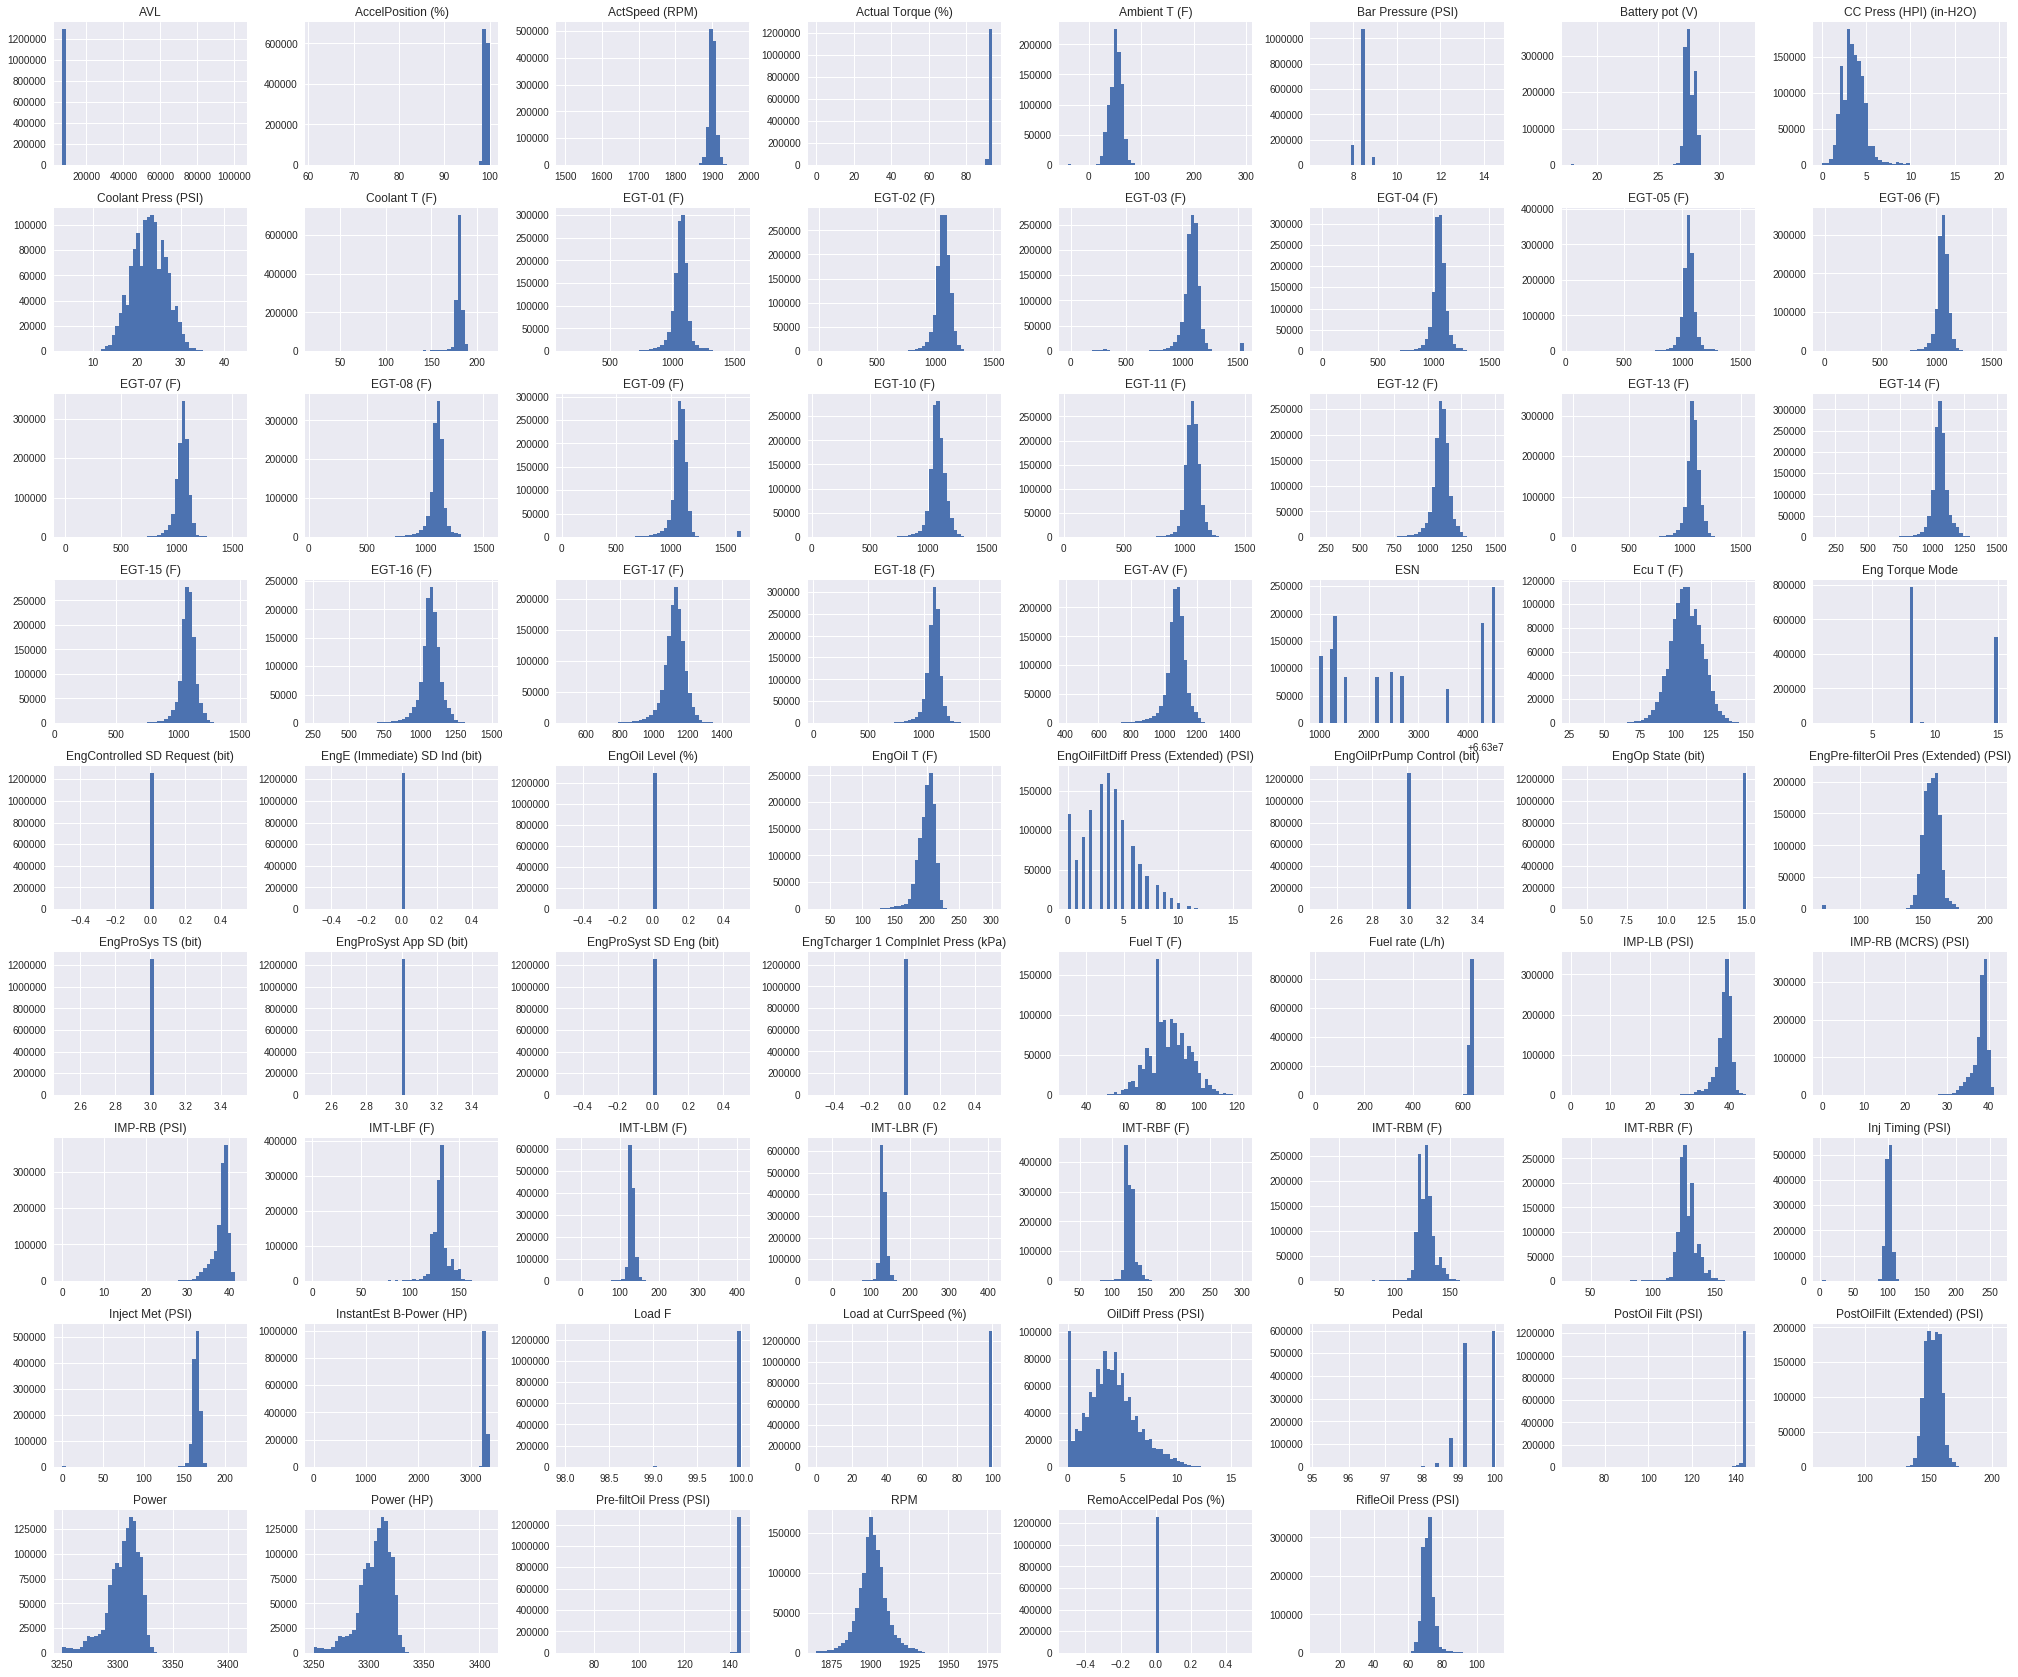

9.49072813987732

In [14]:
start = time.time()
filt_df.hist(bins=50, figsize=(35,30))
plt.show()
end = time.time()
end - start